## import libraries

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## Load dataset

In [158]:
df = pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [159]:
original_shape = df.shape
original_shape

(4424, 35)

## Data preprocessing

####  correct the column name

In [160]:
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

#### check missing data

In [161]:
print(df.isna().sum()) # check null
print('Total Missing: ', df.isna().sum().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

* #### check duplicates

In [162]:
print('Total Duplicates: ', df.duplicated().sum())

Total Duplicates:  0


## Data Exploration

* #### All student status

In [163]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

* #### Distribution by Target

<Axes: xlabel='Target', ylabel='count'>

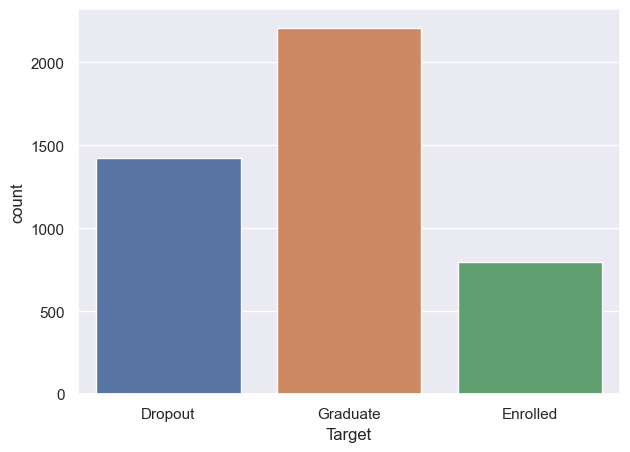

In [164]:
sns.countplot(data=df, x='Target', hue='Target', legend=False)

Because students who are labelled as "enrolled" still have the chance to drop out or graduate, whether they drop out or graduate is unknown. The 'Enrolled' classification will be dropped from the analysis, because to ensure each feature is analyzed in terms of students who graduate or drop out only.

In [165]:
df = df[df.Target != 'Enrolled']

* Verify updated shape

In [166]:
current_shape = df.shape
print(f"After dropping 'Enrolled' values the data frame was reduced from {original_shape[0]} rows to {current_shape[0]} rows.")

After dropping 'Enrolled' values the data frame was reduced from 4424 rows to 3630 rows.


* #### Visualize distribution

The current distribution of the target variable with a frequency distribution table and percentage of the barchart.

In [167]:
# Create data frame containing % of total column
freq_distribution = pd.DataFrame(df['Target'].value_counts())
# rename count column
freq_distribution.rename(columns={'count':'frequency'}, inplace=True)

freq_distribution['percentage'] = round((freq_distribution['frequency'] / df['Target'].value_counts().sum()) * 100, 2)

total_freq =  pd.DataFrame({'frequency': [sum(freq_distribution['frequency'])], 'percentage': sum(freq_distribution['percentage'])}, index=['Total'])

freq_distribution_df = pd.concat([freq_distribution, total_freq])
freq_distribution_df

,frequency,percentage
Graduate,2209,60.85
Dropout,1421,39.15
Total,3630,100.00


Approximately 61% of the sample students are labeled as Graduate and 39% are labeled as Dropout.

* #### Distribution by Age

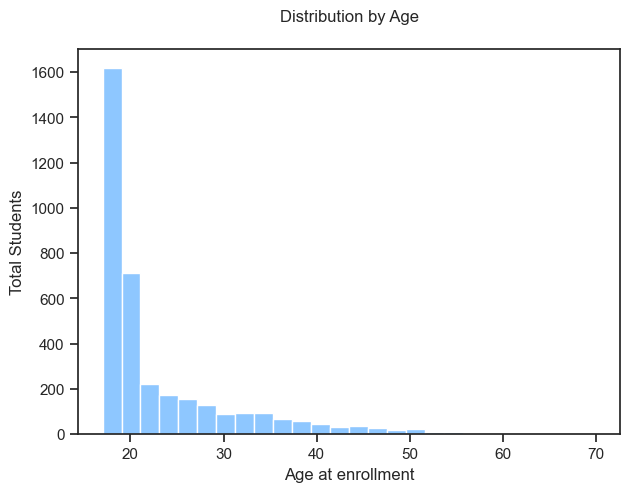

In [168]:
# Create plot
sns.set_style('ticks')
sns.histplot(df, x='Age at enrollment', color='dodgerblue', alpha=0.5, binwidth=2)

# Customize the labels
plt.title('Distribution by Age', pad=20)
plt.ylabel('Total Students')

plt.show()

The majority of students in the sample population are between the ages of 18-21, consistent with what we would expect with undergraduate enrollment.

* #### Distribution by Marital Status

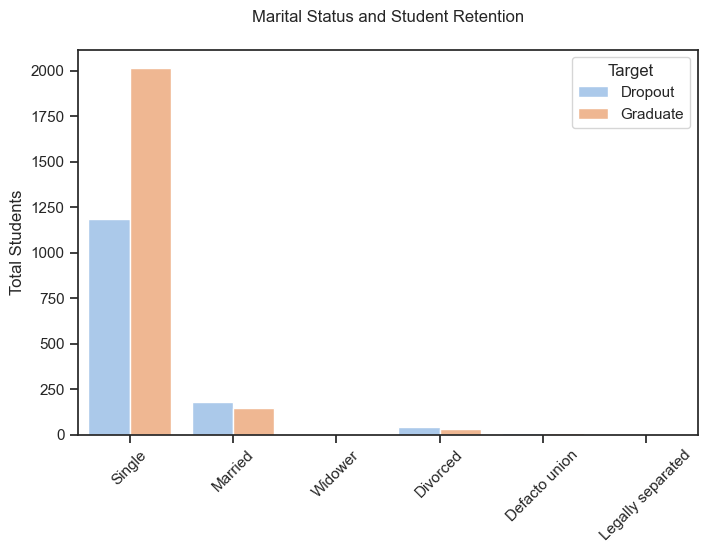

In [169]:
# Create plot
sns.set(rc={'figure.figsize':(8, 5)})
sns.set_style('ticks')
sns.countplot(df, x='Marital status', hue='Target', palette='pastel')

# Change the x tick labels to the corresponding status
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 
                                            'Divorced', 'Defacto union', 'Legally separated'],
                                            rotation=45)
# Customize the labels
plt.ylabel('Total Students')
plt.xlabel(None)
plt.title('Marital Status and Student Retention', pad=20)

plt.show()

Due to the significant imbalance of marital status leaning toward Single students, marital status is not likely to be a significant influence on overall student success.

* #### Distribution by Course Program 

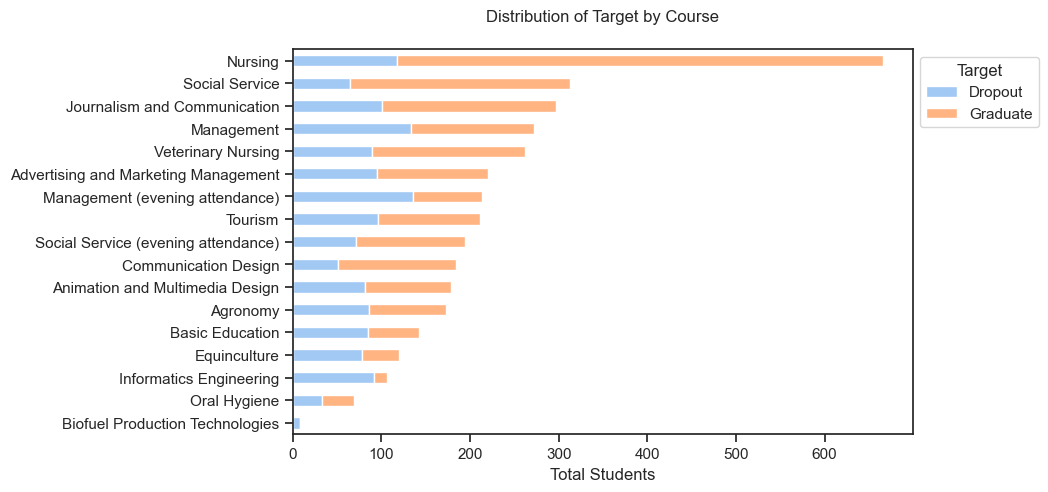

In [170]:
# Group by Course and Target
student_courses = df.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)
student_courses = student_courses.rename(index={1: 'Biofuel Production Technologies',
                                                2: 'Animation and Multimedia Design',
                                                3: 'Social Service (evening attendance)',
                                                4: 'Agronomy',
                                                5: 'Communication Design',
                                                6: 'Veterinary Nursing',
                                                7: 'Informatics Engineering',
                                                8: 'Equinculture',
                                                9: 'Management',
                                                10: 'Social Service',
                                                11: 'Tourism',
                                                12: 'Nursing',
                                                13: 'Oral Hygiene',
                                                14: 'Advertising and Marketing Management',
                                                15: 'Journalism and Communication',
                                                16: 'Basic Education',
                                                17: 'Management (evening attendance)'})

# Sum the total number of students for each course and sort for the plot
student_courses['Total'] = student_courses.sum(axis=1)
student_courses_sorted = student_courses.sort_values(by='Total', ascending=True)

# Remove the 'Total' column
student_courses_sorted.drop(columns='Total', inplace=True)

# Generate the plot
sns.set(rc={'figure.figsize':(8, 5)})
sns.set_style('ticks')
sns.set_palette('pastel')
course_plot = student_courses_sorted.plot(kind='barh', stacked=True)

# Customize the labels
plt.title('Distribution of Target by Course', pad=20)
plt.legend(labels=["Dropout", "Graduate"], title='Target', bbox_to_anchor=(1, 1))
plt.xlabel('Total Students')
plt.ylabel(None)

plt.show()

Most courses have more graduates than dropouts, but there are some interesting insights that may indicate some courses are more challenging for students to complete than others.

* #### Change Target value to binary value (Dropout = 0, Graduate = 1 )

In [171]:
df = pd.get_dummies(df, columns=['Target'])

dummies_to_drop = ['Target_Dropout']
df.drop(columns=dummies_to_drop, inplace=True)
df.rename(columns={'Target_Graduate': 'Target'}, inplace=True)

df['Target'] = df['Target'].map({True:1, False:0})

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


 * ### visualize heatmap
 We separate into demographics and academic for easily to understand

In [172]:
# Demographic
demographics = df[['Marital status', 'Nationality', 'Displaced', 'Gender',
                   'Age at enrollment', 'International', 'Target']]
# Academic
academic_path = df[[
        'Course',
        'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]


Demographics heatmap

Text(0.5, 1.0, 'Demographics Collinearity Heatmap')

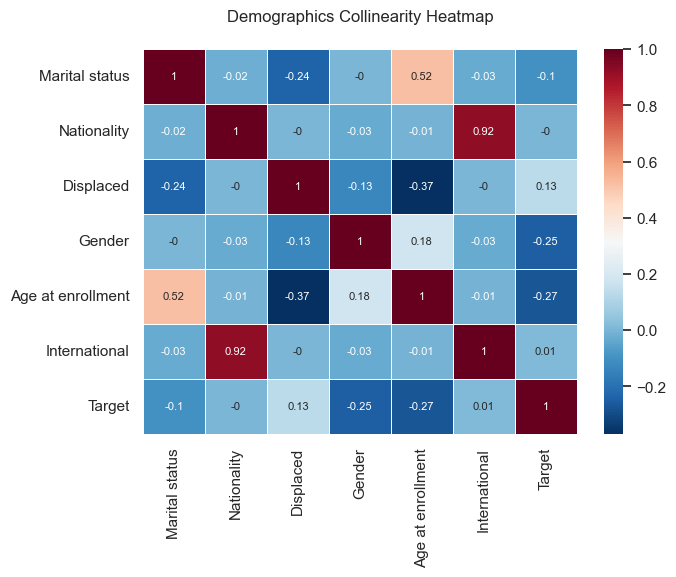

In [173]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.heatmap(demographics.corr().round(2), linewidths=0.5,
            annot=True, annot_kws={"size": 8},
            cmap='RdBu_r')

plt.title('Demographics Collinearity Heatmap', pad=20)

we can see that Nationality and International both have nearly zero with 'Target' features. Hence we will drop both column

In [174]:
drop_feature_list = ['Nationality', 'International']

Academic Heatmap

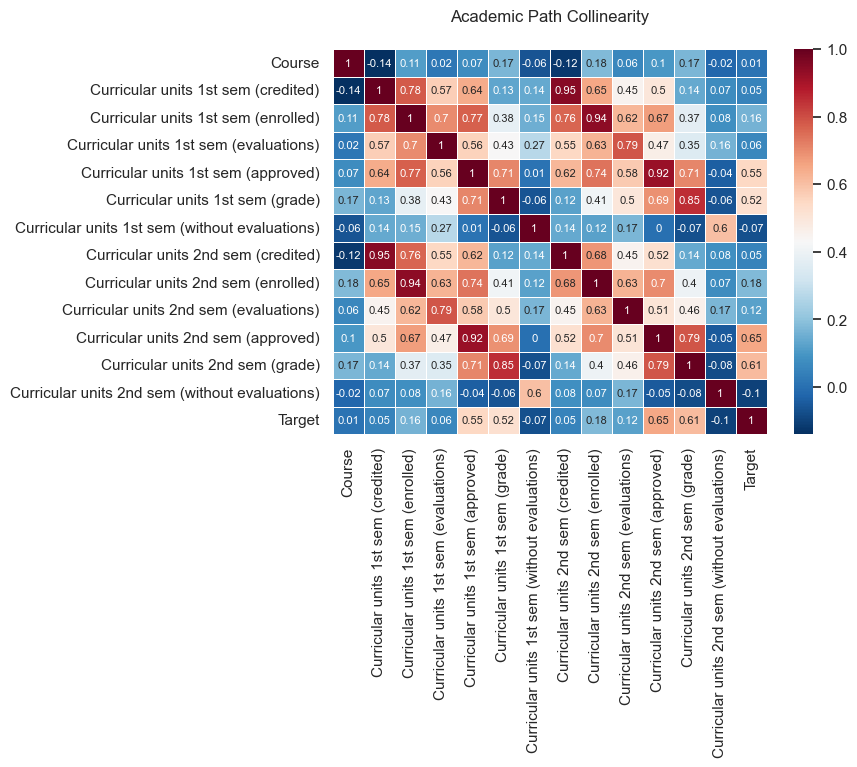

In [175]:
# Create the plot
sns.set(rc={"figure.figsize": (7, 5)})
sns.heatmap(academic_path.corr().round(2), linewidths=0.5,
            annot=True, annot_kws={"size": 8},
            cmap='RdBu_r')
# Customize the labels
plt.title('Academic Path Collinearity', pad=20)

plt.show()

Some of these academic variables are highly correlated with each other, and some have little to no correlation with the target variable. 

In [176]:
# Drop Features
df.drop(drop_feature_list, axis=1, inplace=True)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,3,4,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,22,27,10,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,23,27,6,4,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,22,28,10,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


## Find the feature importance

use a decision tree classifier for feature importance in Python

In [214]:
from sklearn.tree import DecisionTreeClassifier

In [221]:
X = df.drop(columns=['Target'])
y = df['Target']

model = DecisionTreeClassifier()

model.fit(X, y)

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
26,Curricular units 2nd sem (approved),0.562546
13,Tuition fees up to date,0.066426
24,Curricular units 2nd sem (enrolled),0.044274
3,Course,0.029350
21,Curricular units 1st sem (grade),0.027895
27,Curricular units 2nd sem (grade),0.024229
16,Age at enrollment,0.020140
25,Curricular units 2nd sem (evaluations),0.019966
29,Unemployment rate,0.019493
6,Mother's qualification,0.019071


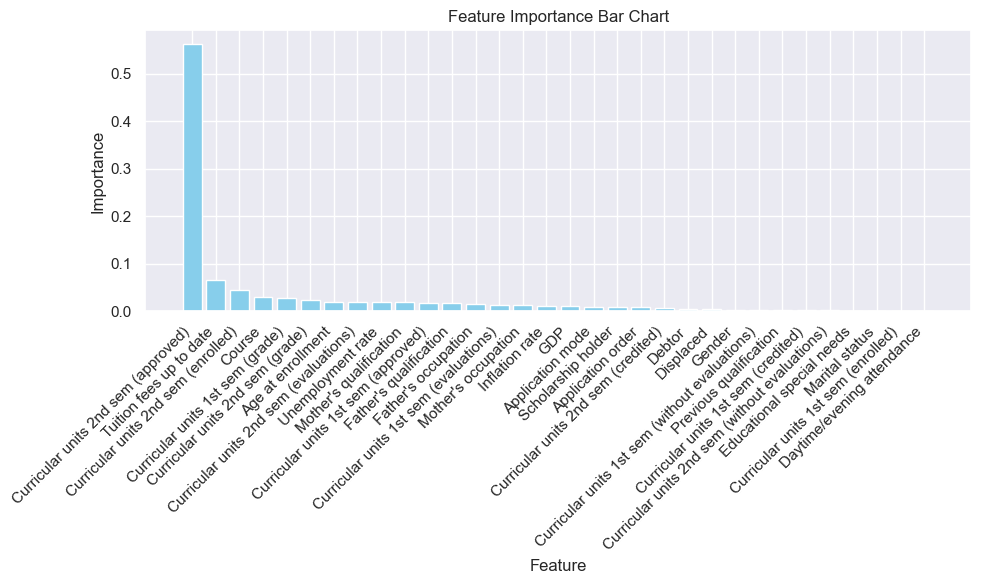

In [230]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Bar Chart')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

* ### Create a correlation matrix

In [177]:
targets = df['Target']
data_matrix = df.drop(columns='Target')
corr_matrix = df

In [178]:
corr_matrix = corr_matrix.corr().round(2)
corr_matrix

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.00,0.24,-0.13,0.00,-0.27,0.13,0.18,0.12,0.07,0.03,...,0.07,0.04,0.03,-0.06,-0.08,0.03,-0.02,0.01,-0.03,-0.10
Application mode,0.24,1.00,-0.25,-0.08,-0.28,0.43,0.10,0.09,0.01,-0.01,...,0.24,0.13,0.16,-0.08,-0.12,0.05,0.08,-0.03,-0.01,-0.23
Application order,-0.13,-0.25,1.00,0.12,0.17,-0.20,-0.06,-0.05,-0.04,-0.03,...,-0.13,0.03,-0.04,0.07,0.06,-0.03,-0.10,-0.00,0.03,0.09
Course,0.00,-0.08,0.12,1.00,-0.03,-0.16,0.04,0.03,0.02,0.00,...,-0.12,0.18,0.06,0.10,0.17,-0.02,-0.05,0.04,0.01,0.01
Daytime/evening attendance,-0.27,-0.28,0.17,-0.03,1.00,-0.12,-0.18,-0.13,-0.04,-0.00,...,-0.11,0.01,0.01,0.05,0.06,-0.01,0.07,-0.02,0.01,0.08
Previous qualification,0.13,0.43,-0.20,-0.16,-0.12,1.00,0.01,0.02,0.00,0.01,...,0.14,0.05,0.08,-0.05,-0.05,0.05,0.09,-0.06,0.06,-0.10
Mother's qualification,0.18,0.10,-0.06,0.04,-0.18,0.01,1.00,0.53,0.31,0.13,...,0.04,0.03,0.03,-0.02,-0.03,0.03,-0.11,0.06,-0.07,-0.05
Father's qualification,0.12,0.09,-0.05,0.03,-0.13,0.02,0.53,1.00,0.22,0.19,...,0.05,0.03,0.01,0.00,-0.01,0.00,-0.07,0.06,-0.06,-0.00
Mother's occupation,0.07,0.01,-0.04,0.02,-0.04,0.00,0.31,0.22,1.00,0.69,...,-0.00,0.00,-0.01,0.03,0.04,-0.00,0.01,0.03,0.07,0.06
Father's occupation,0.03,-0.01,-0.03,0.00,-0.00,0.01,0.13,0.19,0.69,1.00,...,-0.02,-0.01,-0.03,0.03,0.04,-0.05,-0.01,0.03,0.10,0.07


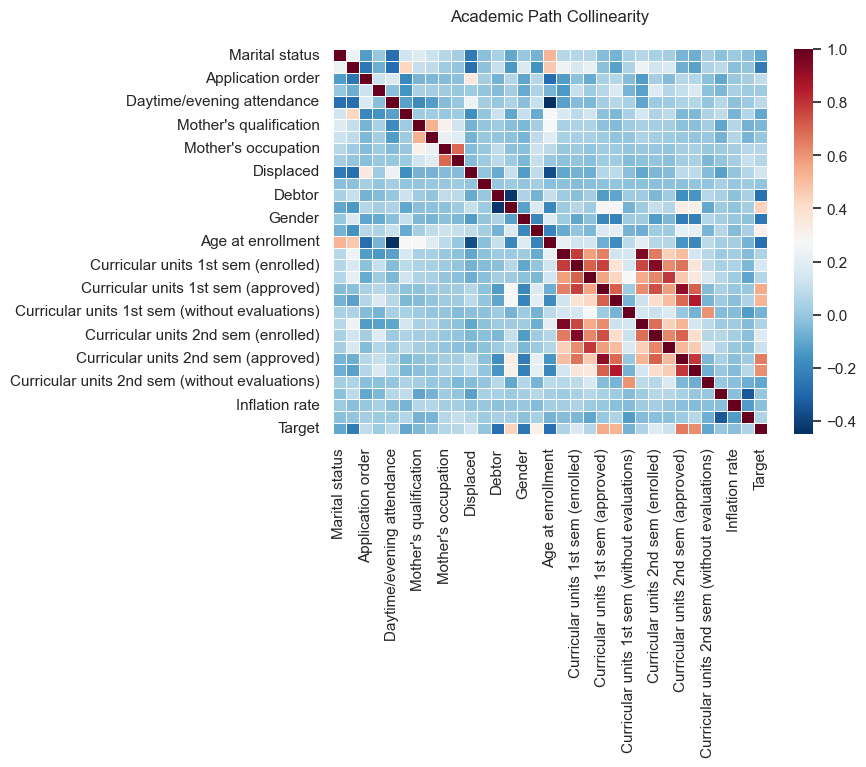

In [179]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.heatmap(corr_matrix, linewidths=0.5,
            cmap='RdBu_r')
# Customize the labels
plt.title('Academic Path Collinearity', pad=20)

plt.show()

## Perform PCA

* #### Perform eigendecomposition.

In [180]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

Eigenvalues length: 32, Original Number of Features: 32


In [181]:
# Order the eigenvalues by ordering the indices of the eigenvalues
indices = eigenvalues.argsort()[::-1] 
eigenvalues = eigenvalues[indices] 
eigenvectors = eigenvectors[:, indices]
print(f'Eigenvalues.shape : {eigenvalues.shape}\nEigenvectors shape : {eigenvectors.shape}')

Eigenvalues.shape : (32,)
Eigenvectors shape : (32, 32)


* #### Find the variance/information percentages for each Eigenvalue

In [182]:
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

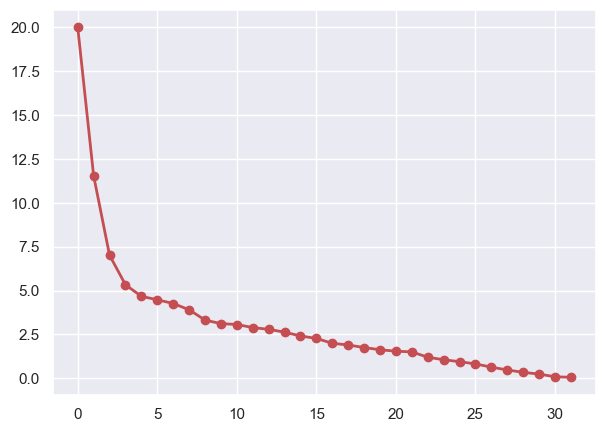

In [183]:
# Plot the principal axes vs the information proportions for each principal axis
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)

From this plot, we see that the zeroth principal component explains about 20% of the variation in the data, the fifth explains 4%, and so on.

* #### Find the cumulative variance/information percentages for each Eigenvalue

In [184]:
# Find the cumulative sum of the percentages
cumulative_information_percents = np.cumsum(information_percents)

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

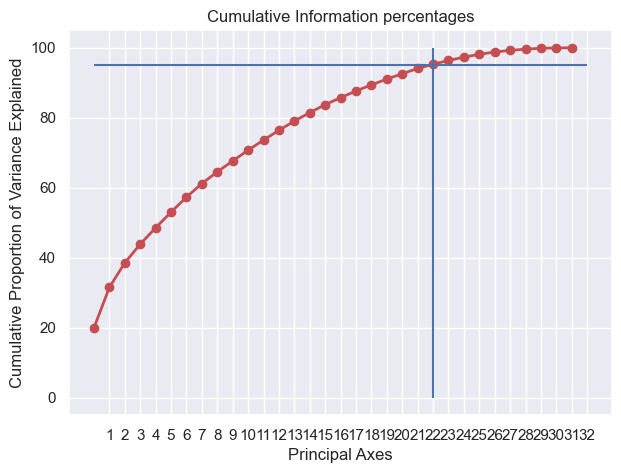

In [185]:
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)
plt.hlines(y=95, xmin=0, xmax=32)
plt.vlines(x=22, ymin=0, ymax=100)
plt.title('Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.xticks(np.arange(1,len(cumulative_information_percents)+1))
plt.ylabel('Cumulative Proportion of Variance Explained')

From this plot, we see that 10 principal axes account for 95% of the variation in the data.

In [186]:
cumulative_information_percents

array([ 19.99608357,  31.53521019,  38.55113634,  43.88636785,
        48.5587824 ,  53.03865414,  57.30371644,  61.21427845,
        64.53543174,  67.65594781,  70.72466542,  73.62192278,
        76.4141826 ,  79.04844949,  81.46536576,  83.74108616,
        85.7410094 ,  87.64368181,  89.40164651,  91.03241199,
        92.58063441,  94.09031241,  95.29638792,  96.35845614,
        97.31109536,  98.13522396,  98.77597586,  99.25558953,
        99.60011926,  99.84618549,  99.93843922, 100.        ])

* #### Standardize the data matrix

In [187]:
# Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd

In [188]:
data_matrix_standardized.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.300644,0.226474,2.436487,-1.828164,0.355801,-0.392825,0.049002,-0.606169,-0.327174,0.544562,...,-0.189845,-0.287646,-2.782308,-1.958316,-1.428817,-1.830833,-0.190122,-0.311269,0.121598,0.774012
1,-0.300644,-0.154216,-0.562393,0.245228,0.355801,-0.392825,-1.283416,-1.242937,-0.866644,-0.845890,...,-0.189845,-0.287646,-0.130984,-0.444756,0.468490,0.662292,-0.190122,0.850801,-1.105918,0.353655
2,-0.300644,-1.105941,2.436487,-1.137033,0.355801,-0.392825,1.048316,0.940266,0.751765,0.544562,...,-0.189845,-0.287646,-0.130984,-1.958316,-1.428817,-1.830833,-0.190122,-0.311269,0.121598,0.774012
3,-0.300644,0.226474,0.187327,1.166735,0.355801,-0.392825,1.159350,0.940266,-0.327174,-0.845890,...,-0.189845,-0.287646,-0.130984,0.564284,0.152272,0.431221,-0.190122,-0.836075,-1.466952,-1.376444
4,1.330654,0.987854,-0.562393,-1.597787,-2.809784,-0.392825,1.048316,1.031232,0.751765,0.544562,...,-0.189845,-0.287646,-0.130984,-0.444756,0.468490,0.540676,-0.190122,0.850801,-1.105918,0.353655


* #### Perform PCA by fitting and transforming the standardized data matrix.

from 'Cumulative Information percentages' plot, we can see it have 10 principal component account for 95% of the variation in the data. So we retain that 8 principal axes.

In [189]:
# Calculating principal components with 10 components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(data_matrix_standardized)
columns = data_matrix_standardized.columns

In [190]:
print(f'Number of Principal Components Features: {principal_components.shape[1]}')
print(f'Number of Original Data Features: {data_matrix_standardized.shape[1]}')

Number of Principal Components Features: 10
Number of Original Data Features: 32


In [213]:
data_pcomp = pd.DataFrame(principal_components)
data_pcomp.columns = [f"PC{i+1}" for i in range(principal_components.shape[1])]
data_pcomp.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.408715,-0.327943,-0.842003,0.409479,1.254545,-1.885248,-0.602796,1.723516,0.019087,-0.387383
1,-0.306889,-0.872873,-2.118834,-0.792151,0.758632,0.750924,0.843894,-1.043634,0.110360,-0.045514
2,-3.907401,0.394211,0.253722,2.091927,1.434029,-2.911021,-0.774923,-0.452595,-0.543350,-0.089632
3,0.437420,-1.052367,0.366166,0.097983,-1.619870,-0.404378,0.304424,-0.445710,-1.253343,-0.843107
4,0.279362,2.550267,2.563394,-1.703329,-1.183971,0.597935,0.335071,1.202799,-0.312293,0.642113


Plot the first two principal components as a scatterplot

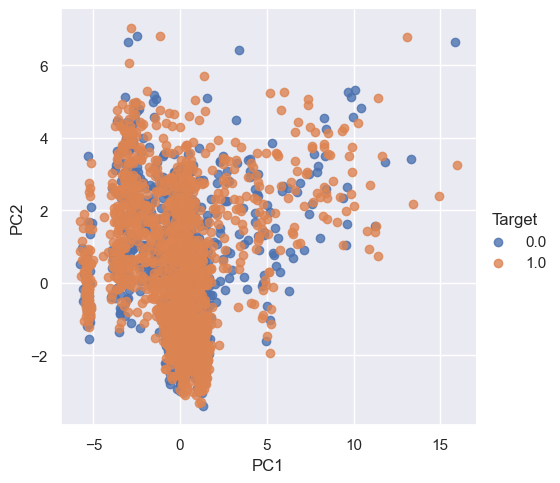

In [193]:
data_pcomp['Target'] = targets
sns.lmplot(x='PC1', y='PC2', data=data_pcomp, hue='Target', fit_reg=False)
plt.show()

## Build a model

In [194]:
targets.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

In [195]:
# Use the principal components as X
X = pca.fit_transform(data_matrix_standardized)

# Use the one-hot-encoded targets as the y (Dropout = 0, Graduate = 1 )
y = targets

Data Splitting

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X has {X.shape[0]} rows of data.")
print(f"X_train has {X_train.shape[0]} rows of data.")
print(f"X_test has {X_test.shape[0]} rows of data.\n")
print(f"y has {y.shape[0]} rows of data.")
print(f"y has {y_train.shape[0]} rows of data.")
print(f"y has {y_test.shape[0]} rows of data.")

X has 3630 rows of data.
X_train has 2541 rows of data.
X_test has 1089 rows of data.

y has 3630 rows of data.
y has 2541 rows of data.
y has 1089 rows of data.


Import libraries

In [197]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

* ### K-Nearest Neighbors

In [198]:
# Create a KNN classifier with the number of neighbors set to 8
knn_model = KNeighborsClassifier(n_neighbors=8)

# Train the model
knn_model.fit(X_train, y_train)

# Use the model for predictions
knn_y_train_pred = knn_model.predict(X_train)
knn_y_test_pred = knn_model.predict(X_test)

* Evaluate Model Performance

In [199]:
# Calculate accuracy, precision, recall, and F1 score using predicted and actual labels for the KNN classifier on the training set
knn_train_accuracy = accuracy_score(y_train, knn_y_train_pred).round(3)
knn_train_precision = precision_score(y_train, knn_y_train_pred).round(3)
knn_train_recall = recall_score(y_train, knn_y_train_pred).round(3)
knn_train_f1 = f1_score(y_train, knn_y_train_pred).round(3)

In [200]:
# Calculate accuracy, precision, recall, and F1 score using predicted and actual labels for the KNN classifier on the test set
knn_test_accuracy = accuracy_score(y_test, knn_y_test_pred).round(3)
knn_test_precision = precision_score(y_test, knn_y_test_pred).round(3)
knn_test_recall = recall_score(y_test, knn_y_test_pred).round(3)
knn_test_f1 = f1_score(y_test, knn_y_test_pred).round(3)

In [201]:
# Create a performance Dataframe
knn_result = pd.DataFrame(['K-Nearest Neighbors', knn_train_accuracy, knn_train_precision, knn_train_recall, knn_train_f1, knn_test_accuracy, knn_test_precision, knn_test_recall, knn_test_f1]).transpose()
knn_result.columns = ['Method', 'Accuracy(Train)', 'Precision(Train)', 'Recall(Train)', 'F1(Train)', 'Accuracy(Test)', 'Precision(Test)', 'Recall(Test)', 'F1(Test)']

knn_result

,Method,Accuracy(Train),Precision(Train),Recall(Train),F1(Train),Accuracy(Test),Precision(Test),Recall(Test),F1(Test)
0,K-Nearest Neighbors,0.887,0.872,0.954,0.911,0.86,0.849,0.941,0.892


* ### Logistic Regression

In [202]:
# Creating an instance of Logistic Regression model
lr_model = LogisticRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_y_train_pred = lr_model.predict(X_train)
lr_y_test_pred = lr_model.predict(X_test)

* Evaluate Model Performance

In [203]:
# Calculate accuracy, precision, recall, and F1 score using predicted and actual labels for the Logistic Regression classifier on the training set
lr_train_accuracy = accuracy_score(y_train, lr_y_train_pred).round(3)
lr_train_precision = precision_score(y_train, lr_y_train_pred).round(3)
lr_train_recall = recall_score(y_train, lr_y_train_pred).round(3)
lr_train_f1 = f1_score(y_train, lr_y_train_pred).round(3)

In [204]:
# Calculate accuracy, precision, recall, and F1 score using predicted and actual labels for the Logistic Regression classifier on the test set
lr_test_accuracy = accuracy_score(y_test, lr_y_test_pred).round(3)
lr_test_precision = precision_score(y_test, lr_y_test_pred).round(3)
lr_test_recall = recall_score(y_test, lr_y_test_pred).round(3)
lr_test_f1 = f1_score(y_test, lr_y_test_pred).round(3)

In [205]:
# Create a performance Dataframe
lr_result = pd.DataFrame(['Logistic Regression', lr_train_accuracy, lr_train_precision, lr_train_recall, lr_train_f1, lr_test_accuracy, lr_test_precision, lr_test_recall, lr_test_f1]).transpose()
lr_result.columns = ['Method', 'Accuracy(Train)', 'Precision(Train)', 'Recall(Train)', 'F1(Train)', 'Accuracy(Test)', 'Precision(Test)', 'Recall(Test)', 'F1(Test)']

lr_result

,Method,Accuracy(Train),Precision(Train),Recall(Train),F1(Train),Accuracy(Test),Precision(Test),Recall(Test),F1(Test)
0,Logistic Regression,0.863,0.857,0.927,0.891,0.87,0.861,0.942,0.9


* ### Support Vector Machine

In [206]:
# Initialize Support Vector Machine model
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model on the training set
svc_model.fit(X_train, y_train)

# Make predictions on the test set
svc_y_train_pred = svc_model.predict(X_train)
svc_y_test_pred = svc_model.predict(X_test)

* Evaluate Model Performance

In [207]:
# Calculate accuracy, precision, recall, and F1 score using predicted and actual labels for the Support Vector Machine classifier on the training set
svc_train_accuracy = accuracy_score(y_train, svc_y_train_pred).round(3)
svc_train_precision = precision_score(y_train, svc_y_train_pred).round(3)
svc_train_recall = recall_score(y_train, svc_y_train_pred).round(3)
svc_train_f1 = f1_score(y_train, svc_y_train_pred).round(3)

In [208]:
# Calculate accuracy, precision, recall, and F1 score using predicted and actual labels for the Support Vector Machine classifier on the test set
svc_test_accuracy = accuracy_score(y_test, svc_y_test_pred).round(3)
svc_test_precision = precision_score(y_test, svc_y_test_pred).round(3)
svc_test_recall = recall_score(y_test, svc_y_test_pred).round(3)
svc_test_f1 = f1_score(y_test, svc_y_test_pred).round(3)

In [228]:
# Create a performance Dataframe
svc_result = pd.DataFrame(['Support Vector Machine', svc_train_accuracy, svc_train_precision, svc_train_recall, svc_train_f1, svc_test_accuracy, svc_test_precision, svc_test_recall, svc_test_f1]).transpose()
svc_result.columns = ['Method', 'Accuracy(Train)', 'Precision(Train)', 'Recall(Train)', 'F1(Train)', 'Accuracy(Test)', 'Precision(Test)', 'Recall(Test)', 'F1(Test)']

svc_result

,Method,Accuracy(Train),Precision(Train),Recall(Train),F1(Train),Accuracy(Test),Precision(Test),Recall(Test),F1(Test)
0,Support Vector Machine,0.902,0.876,0.975,0.923,0.877,0.857,0.961,0.906


* ## Model Comparison

In [236]:
compare_model = pd.concat([knn_result, lr_result, svc_result], axis=0).reset_index(drop=True)
compare_model.set_index('Method', inplace=True)

In [237]:
compare_model

,Accuracy(Train),Precision(Train),Recall(Train),F1(Train),Accuracy(Test),Precision(Test),Recall(Test),F1(Test)
Method,,,,,,,,
K-Nearest Neighbors,0.887,0.872,0.954,0.911,0.86,0.849,0.941,0.892
Logistic Regression,0.863,0.857,0.927,0.891,0.87,0.861,0.942,0.9
Support Vector Machine,0.902,0.876,0.975,0.923,0.877,0.857,0.961,0.906


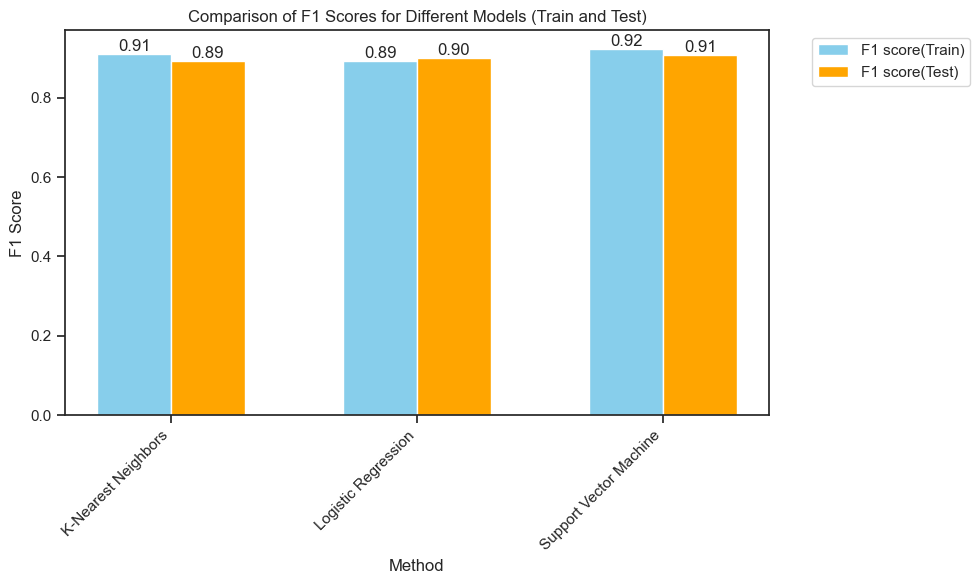

In [248]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.3
index = np.arange(len(compare_model.index))

bar1 = ax.bar(index - bar_width/2, compare_model['F1(Train)'], bar_width, label='F1 score(Train)', color='skyblue')
bar2 = ax.bar(index + bar_width/2, compare_model['F1(Test)'], bar_width, label='F1 score(Test)', color='orange')

ax.set_xlabel('Method')
ax.set_ylabel('F1 Score')
ax.set_title('Comparison of F1 Scores for Different Models (Train and Test)')
ax.set_xticks(index)
ax.set_xticklabels(compare_model.index, rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with the actual F1 score values
for i, rect in enumerate(bar1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, f'{compare_model.iloc[i]["F1(Train)"]:.2f}', ha='center', va='bottom')

for i, rect in enumerate(bar2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, f'{compare_model.iloc[i]["F1(Test)"]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()